In [1]:
import numpy as np

from mushroom_hyperscanning.data import load_eeg

In [2]:
SUBJECT = "01"
CEREMONY = "ceremony1"
BIDS_ROOT = "../data/003_sanitization"

In [3]:
raw = load_eeg(SUBJECT, CEREMONY, root=BIDS_ROOT, preload=True)
raw.crop(tmax=60 * 20)  # use 20 minutes of data to test

Extracting EDF parameters from /home/philipp/projects/mushroom_hyperscanning/data/003_sanitization/sub-01/ses-ceremony1/eeg/sub-01_ses-ceremony1_task-psilo_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5612999  =      0.000 ... 18709.997 secs...


/home/philipp/projects/mushroom_hyperscanning/mushroom_hyperscanning/data.py:36: RuntimeWarning: The unit for channel(s) CM has changed from V to NA.
  raw.info.set_channel_types({ch: CH_TYPE_MAPPING[ch] if ch in CH_TYPE_MAPPING else "eeg" for ch in raw.ch_names})


<RawEDF | sub-01_ses-ceremony1_task-psilo_eeg.edf, 23 x 360001 (1200.0 s), ~63.2 MiB, data loaded>

Effective window size : 6.827 (s)
Plotting power spectral density (dB=True).


/home/philipp/micromamba/envs/gfi/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


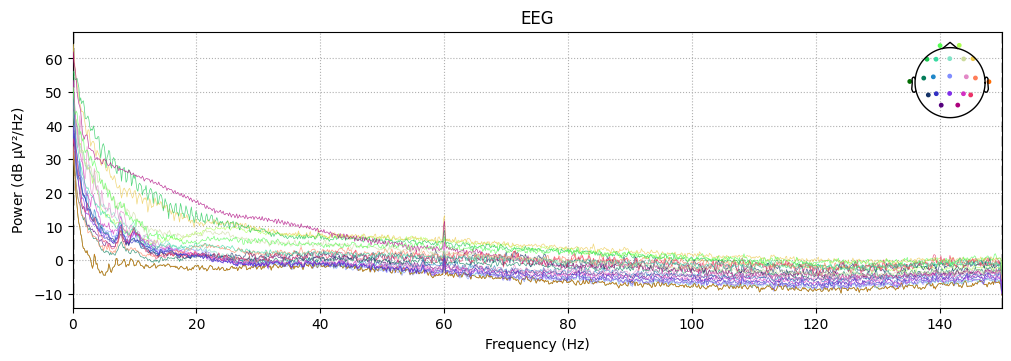

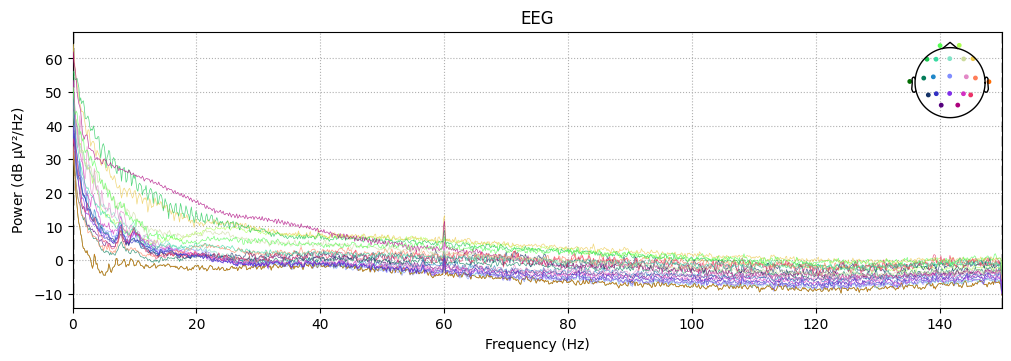

In [4]:
raw.compute_psd().plot()

In [5]:
from pyprep.prep_pipeline import PrepPipeline

# Fit prep
prep_params = {
    "ref_chs": "eeg",
    "reref_chs": "eeg",
    "line_freqs": np.arange(60, raw.info["sfreq"] / 2, 60),
}

prep = PrepPipeline(raw.copy(), prep_params, raw.get_montage())
prep.fit()

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 991 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


Removed notch frequencies (Hz):
     60.00 : 5019 windows
    120.00 : 5019 windows
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 991 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/240 [00:00<?,       ?it/s]


RANSAC done!


2025-09-12 14:50:15,552 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['C4'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F4', 'Fp2', 'T3', 'O2', 'F7', 'F8', 'T6', 'T4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['P3'], 'bad_by_manual': [], 'bad_all': ['O2', 'F4', 'F8', 'P3', 'C4', 'F7', 'Fp2', 'T3', 'T4', 'T6']}


OSError: Too many noisy channels in the data to reliably perform RANSAC (only 1 good channels remaining, need at least 6).